In [55]:
import numpy as np
import matplotlib.pyplot as plt
from numba.cpython.randomimpl import double
from numpy.typing import NDArray
import scipy
from traitlets.config.sphinxdoc import write_doc
from pynufft import NUFFT

In [295]:
def datos_prueba(t_max:float, dt:float, amplitudes:NDArray[float], frecuencias:NDArray[float], ruido:float=0.0) -> NDArray[float]:
    ts = np.arange(0.,t_max,dt)
    ys = np.zeros_like(ts,dtype=float)
    for A,f in zip(amplitudes,frecuencias):
        ys += A*np.sin(2*np.pi*f*ts)
        ys += np.random.normal(loc=0,size=len(ys),scale=ruido) if ruido else 0
    return ts,ys

In [296]:
t_total = 5
t_diff = 0.1
amplitudes = [10,20,15]
frecuencias = [4,np.pi,np.sqrt(2)]
t_clean, y_clean = datos_prueba(t_total,t_diff,np.array(amplitudes),np.array(frecuencias))
t_noise, y_noise = datos_prueba(t_total,t_diff,np.array(amplitudes),np.array(frecuencias),20)


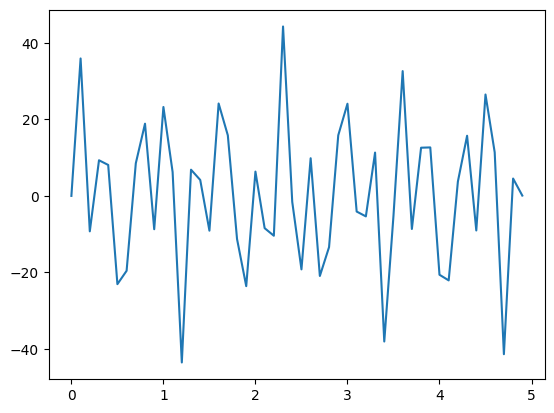

In [297]:
plt.plot(t_clean, y_clean)

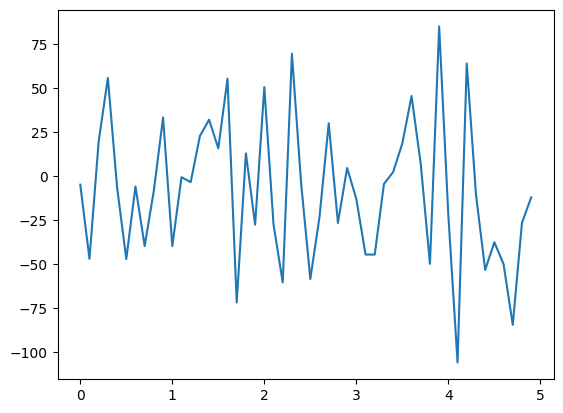

In [298]:
plt.plot(t_noise, y_noise)

In [2]:
def Fourier(t:NDArray[float], y:NDArray[float], f:NDArray[float]) -> NDArray[complex]:
    f_hat = []
    for i,f_k in enumerate(f):
        f_hat.append(np.sum(np.multiply(y,np.exp(-2j*np.pi*f_k*t)),dtype=complex))
    return f_hat

1.a) Los picos correctos presentan un corrimiento y la transformada se distorsiona


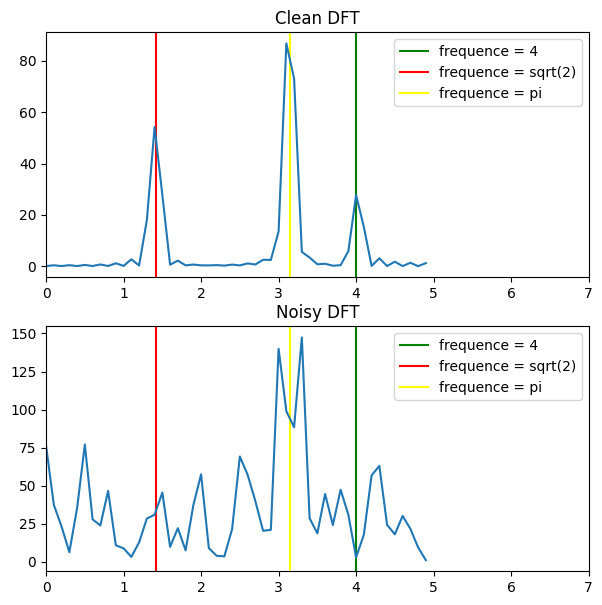

In [300]:
fs = np.arange(0,1/(2*t_diff),1/(2*t_total))
fig, axs =plt.subplots(2,figsize=(7,7))

axs[0].set_title('Clean DFT')
axs[1].set_title('Noisy DFT')
for i in range(2):
    axs[i].axis([0,t_total+2,None,None])
    axs[i].axvline(4,color ='green',label= "frequence = 4")
    axs[i].axvline(np.sqrt(2),color ='red', label = "frequence = sqrt(2)")
    axs[i].axvline(np.pi,color ='yellow',label = "frequence = pi")
axs[0].plot(fs,np.abs(Fourier(t_clean,y_clean,fs))**2)
axs[1].plot(fs,np.abs(Fourier(t_noise,y_noise,fs))**2)
axs[0].legend()
axs[1].legend()
fig.savefig('1.a.pdf')
print("1.a) Los picos correctos presentan un corrimiento y la transformada se distorsiona")

In [301]:
t_b, y_b = datos_prueba(t_total,t_diff,np.array([5]),np.array([2]))

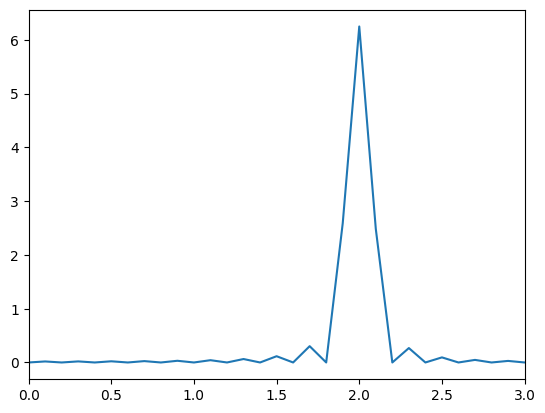

In [302]:
f_bhat = np.abs(Fourier(t_b,y_b,fs))**2
plt.gca().axis([0,3,None,None])
plt.plot(fs,f_bhat)

In [375]:
var = np.arange(10,300)
widths = np.zeros_like(var,dtype=np.double)
t_diff = 0.005
for i,t in enumerate(var):
    t_b, y_b = datos_prueba(t,t_diff,np.array([5]),np.array([2]))
    fs = np.arange(0,3,t_diff)
    f_bhat = np.abs(Fourier(t_b,y_b,fs))**2
    widths[i] = scipy.signal.peak_widths(f_bhat,[np.argmax(f_bhat)],rel_height=0.5)[0][0]

In [378]:
widths

array([17.7219834 , 16.11131322, 14.77208948, 13.63226572, 12.66345815,
       11.81348639, 11.08086136, 10.43061331,  9.84405853,  9.33037895,
        8.86936479,  8.44809124,  8.05598023,  7.7038537 ,  7.38675497,
        7.09684545,  6.82894356,  6.57867175,  6.34226557,  6.11642072,
        5.90453172,  5.71322228,  5.53650789,  5.37241744,  5.21924795,
        5.07551429,  4.9399133 ,  4.81129116,  4.68861783,  4.57096463,
        4.45748661,  4.34740582,  4.23999849,  4.13458188,  4.03050451,
        3.93325837,  3.84342965,  3.75888495,  3.67917006,  3.60387559,
        3.53263199,  3.46510435,  3.40098891,  3.34000898,  3.28191246,
        3.22646855,  3.17346582,  3.12270998,  3.07402206,  3.02723672,
        2.982201  ,  2.93877272,  2.89681974,  2.85621851,  2.81685357,
        2.77861632,  2.74140458,  2.70512176,  2.66967628,  2.63498097,
        2.60095265,  2.56751149,  2.53458075,  2.50208618,  2.46995585,
        2.43811955,  2.40650861,  2.37505553,  2.34369366,  2.31

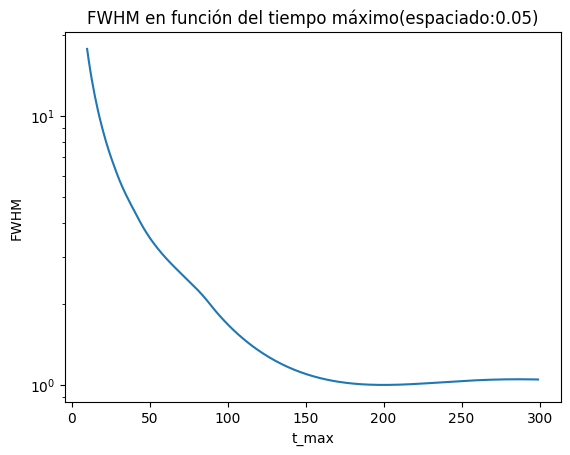

In [390]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_title("FWHM en función del tiempo máximo(espaciado:0.05)")
ax.set_ylabel("FWHM")
ax.set_xlabel("t_max")
ax.set_yscale('log')
ax.plot(var,widths)
fig.savefig('1.b.pdf')

In [391]:
var

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

[2.23157704e-04 2.14724806e+01]


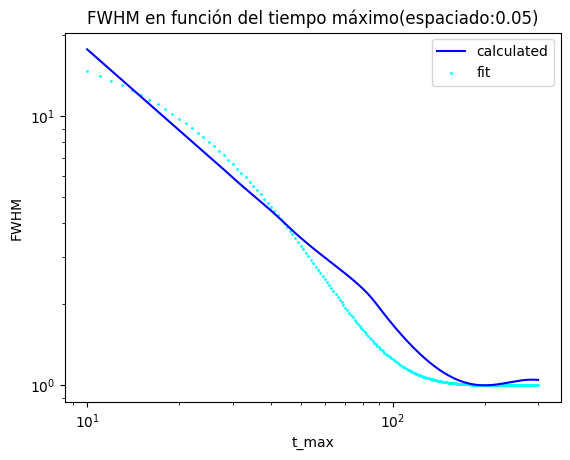

In [415]:
def func(x, a, c):
    return 1 + c*np.exp(-a*x/t_diff)
popt, pcov = scipy.optimize.curve_fit(func, var, widths, p0=(2e-4,2e1))
print(popt)
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
yy = func(var,*popt)
ax.set_title("FWHM en función del tiempo máximo(espaciado:0.05)")
ax.set_ylabel("FWHM")
ax.set_xlabel("t_max")
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(var,widths,c='blue',label="calculated")
ax.scatter(var,yy,c='cyan',s=1,label="fit")
ax.legend()
fig.savefig('1.b.pdf')

In [85]:
t,y,sigma = np.genfromtxt('punto1.dat').T
t_min = np.min(np.diff(t))
fs = np.arange(1/(t[-1]-t[0]),10/(2*(t_min)),1/(t[-1]-t[0]))
f_hat = Fourier(t,y,fs)

In [44]:
np.abs(f_hat[0])

np.float64(433.16355877973143)

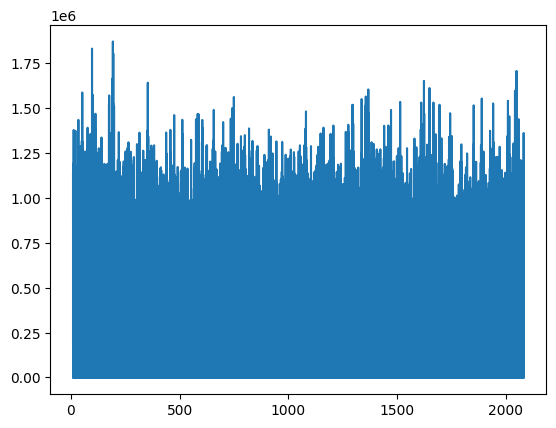

In [45]:
plt.plot(fs,np.abs(f_hat)**2)

In [99]:
max_fq = fs[np.argmax(np.abs(f_hat[100:])**2)]
max_fq

np.float64(0.9579161119407604)

In [47]:
print("1.c) f Nyquist: {:.3f} hz".format(2*max_fq))
print("1.c) f true: {:.3f} hz".format(max_fq))

1.c) f Nyquist: 386.365 hz
1.c) f true: 193.182 hz


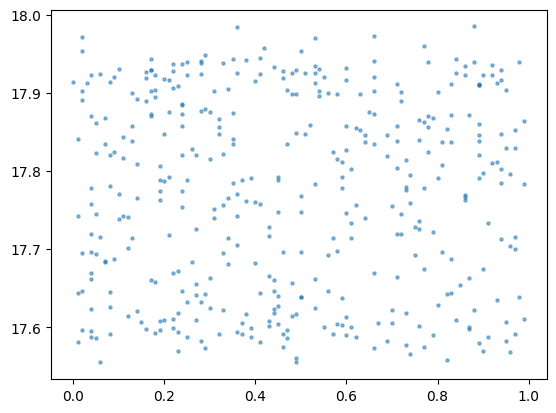

In [129]:
phi = np.mod(1000*t,1)
plt.scatter(phi, y, s=5, alpha=0.5)

np.float64(0.0)

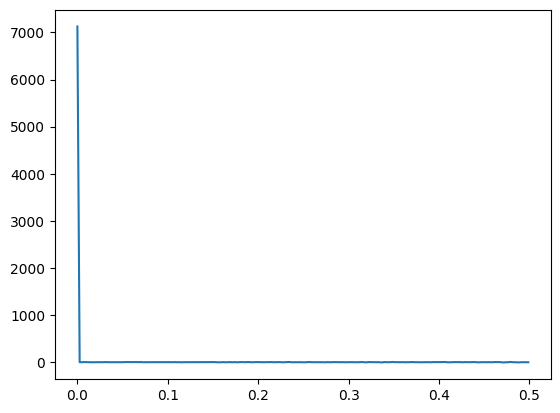

In [79]:
f_hat = np.fft.rfft(y)
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,f_hat)
freqs[np.argmax(f_hat)]

In [144]:
y = y-np.average(y)

array([-0.13044888,  0.04655112, -0.15944888, -0.17944888, -0.08244888,
        0.10755112, -0.16844888,  0.07855112, -0.17744888,  0.12255112,
       -0.02144888,  0.07955112,  0.00455112,  0.13255112,  0.07355112,
        0.01555112, -0.03644888,  0.10455112, -0.13044888,  0.13455112,
        0.05755112, -0.17244888,  0.05555112, -0.02644888, -0.05544888,
       -0.16544888,  0.05455112, -0.14744888,  0.13055112, -0.17144888,
        0.12955112,  0.14955112,  0.17555112, -0.21344888, -0.14744888,
        0.20055112, -0.17344888, -0.01144888,  0.15655112,  0.04255112,
       -0.07744888,  0.10255112, -0.18244888,  0.02255112, -0.02844888,
       -0.08844888,  0.12855112, -0.19244888,  0.10655112, -0.09544888,
       -0.05544888, -0.20344888,  0.15955112, -0.16744888,  0.14655112,
       -0.07144888, -0.15444888,  0.04155112, -0.21144888, -0.04344888,
        0.08455112, -0.17044888,  0.06755112, -0.12944888, -0.16644888,
        0.11455112, -0.16844888,  0.15655112, -0.18744888,  0.14

In [201]:
fs = np.arange(0,300,1/(20*(t[-1]-t[0])))
f_hat = Fourier(t,y,fs)

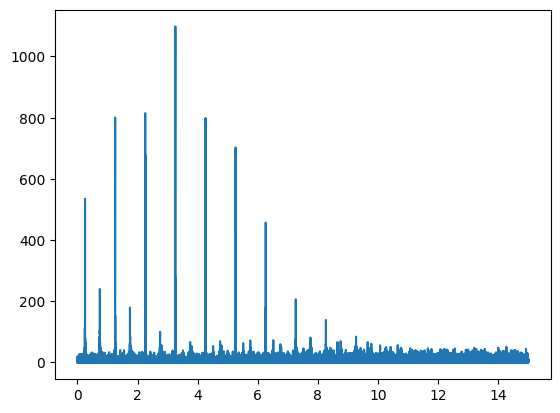

In [199]:
freq = fs[np.argmax(np.abs(f_hat)**2)]
# plt.axvline(freq)
plt.plot(fs,np.abs(f_hat)**2)


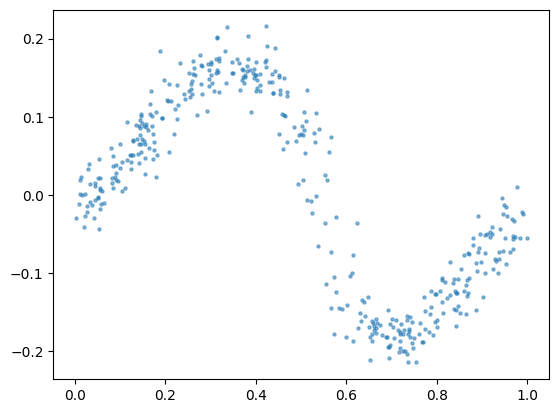

In [191]:
phi = np.mod(freq*t,1)
plt.scatter(phi, y, s=5, alpha=0.5)